In [1]:
import glob
import sys
sys.path.append('../python/')
from json2graph import jsonFile2graph
from graphUtils import plot_graph
from statsUtils import whichFitsBetter

# Read observable graphs

In [2]:
import networkx as nx
import glob
import json
import os
#"/home/antolin/wakame/randomStuff/RealisticModels/EcoreReal/*.json"
files = glob.glob("../realGraphs/Yakindu/R2/*.json")

Gs = []
for file in files:
    Gs.append(jsonFile2graph(file))


## Ploting yakindu

In [12]:
import random
random.seed(123)

sample = random.sample(Gs,3)

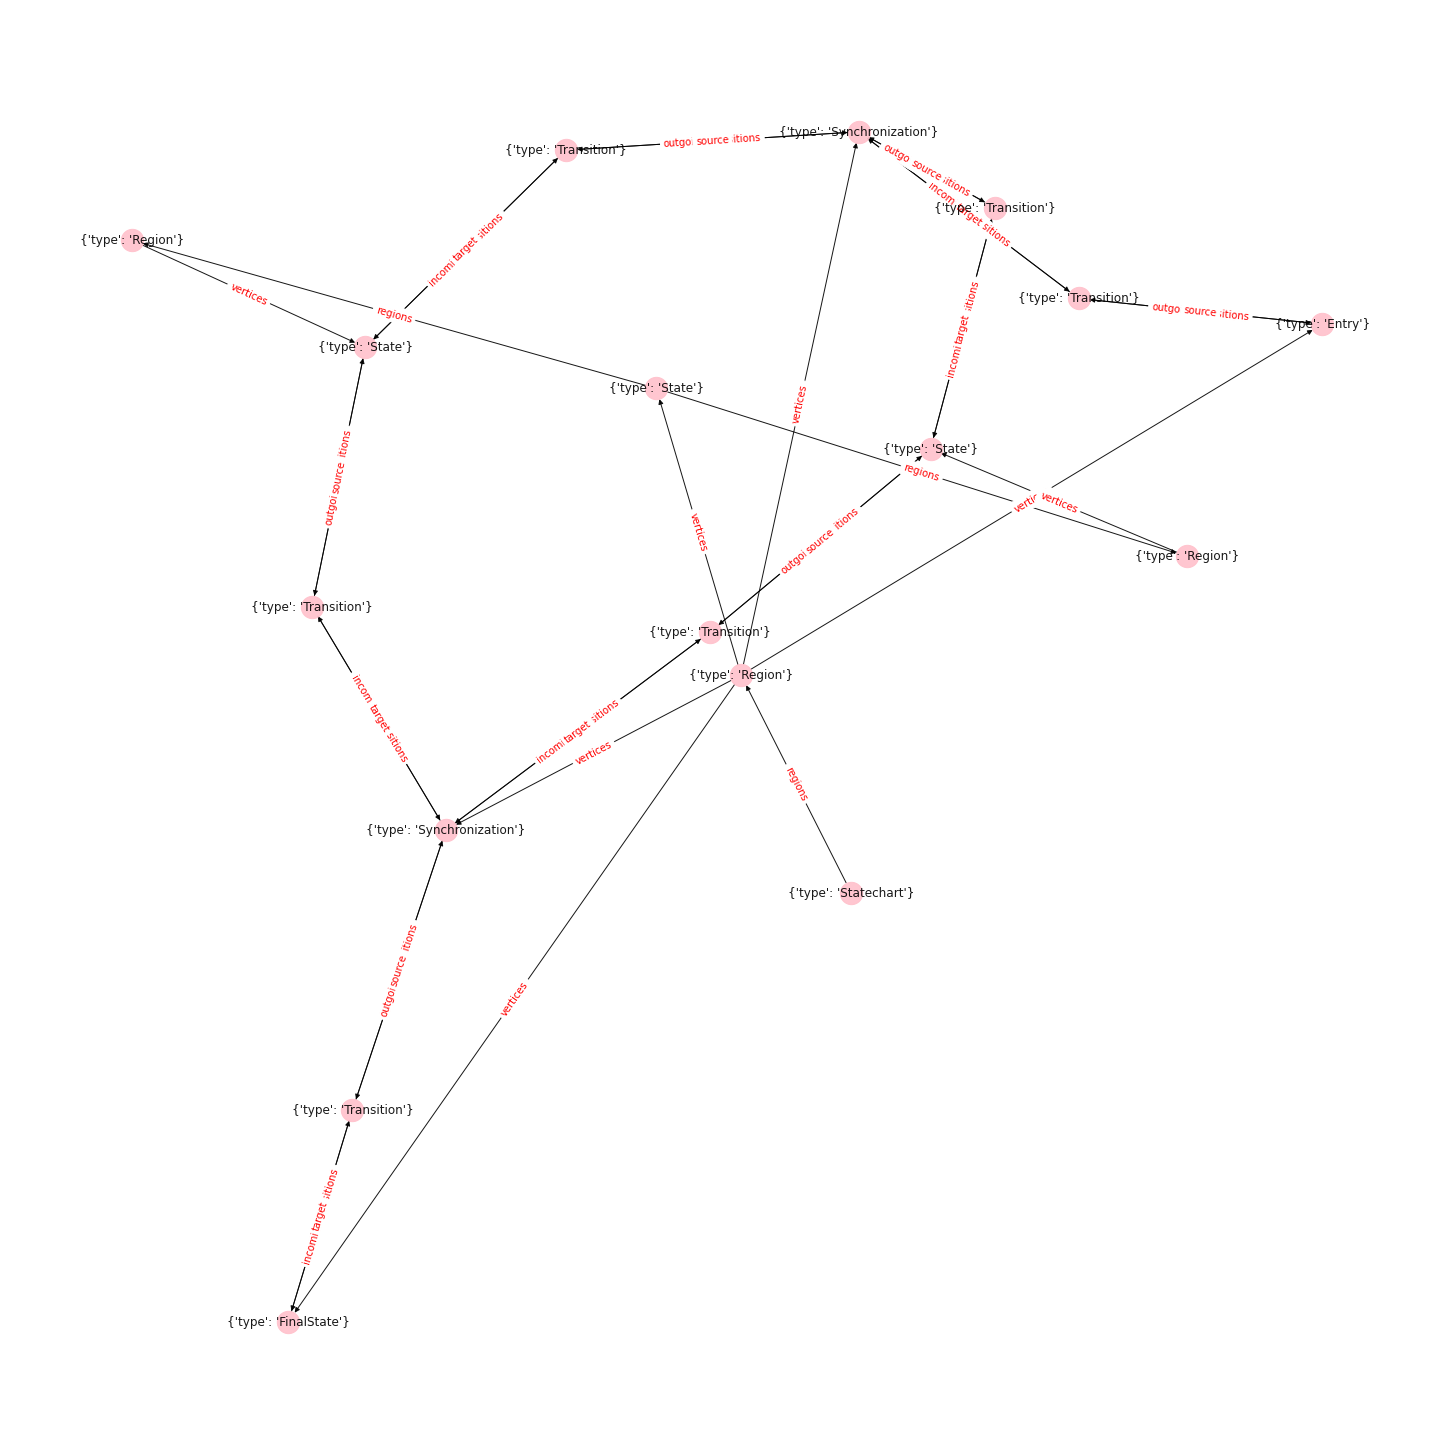

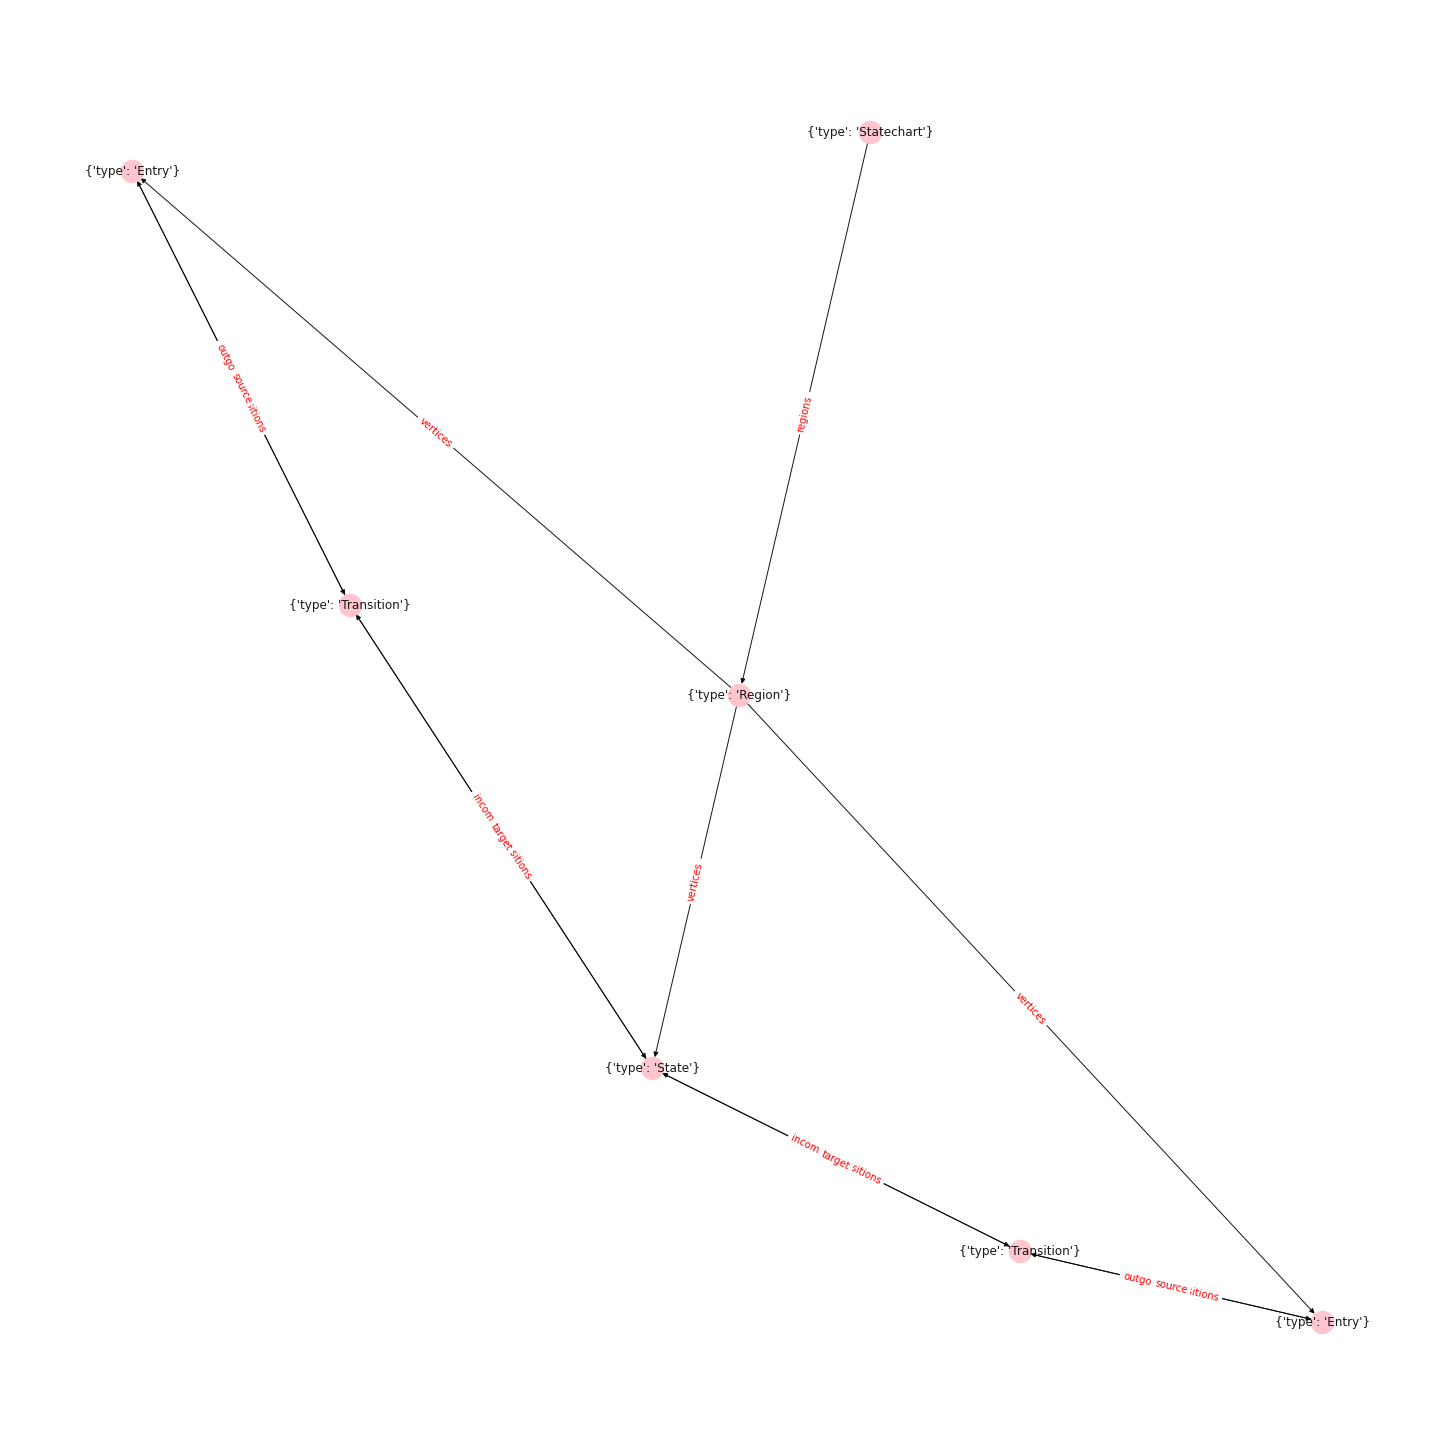

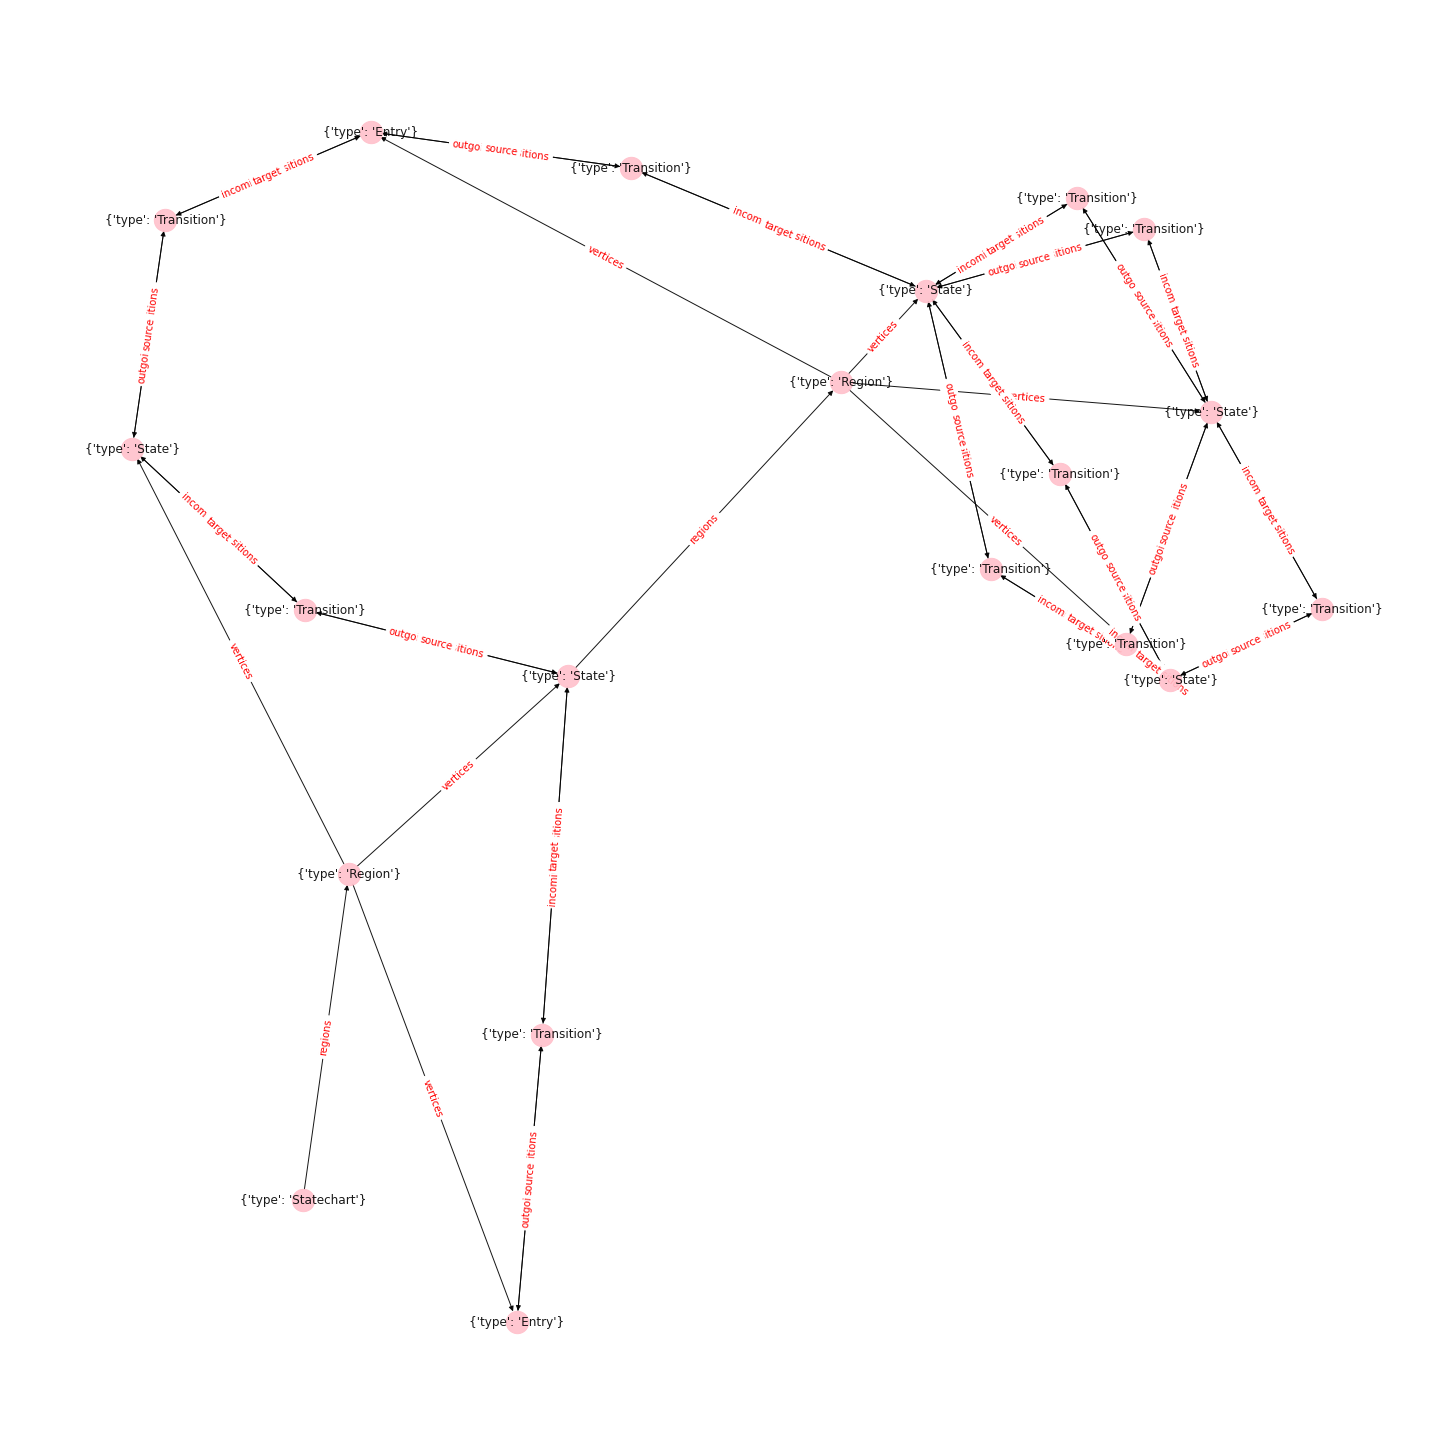

In [4]:
for s in sample:
    plot_graph(s)

All models have only one statechart.

In [5]:
cont = 0
for G in Gs:
    for n in G:
        if (G.nodes[n]['type']=='Statechart'):
            cont = cont + 1
cont == len(Gs)

True

# Random EMF

## Number of regions per statechart

(array([172.,   0.,  12.]),
 array([1. , 1.5, 2. , 2.5]),
 <a list of 3 Patch objects>)

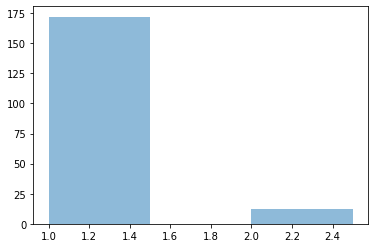

In [6]:
import matplotlib.pyplot as plt
import numpy as np

nums = []
for G in Gs:
    nums.append(G.out_degree(0))
bins = np.arange(1, 3, 0.5)
plt.hist(nums, bins = bins, alpha=0.5, density = False)

In [7]:
whichFitsBetter(nums)

Optimization terminated successfully.
         Current function value: 0.160800
         Iterations: 18
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 1.051852
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'norm', 'params': (1.0756756756756756, 0.28418247412097114)}

## Number of regions per state

(array([0.90842491, 0.07509158, 0.01648352, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

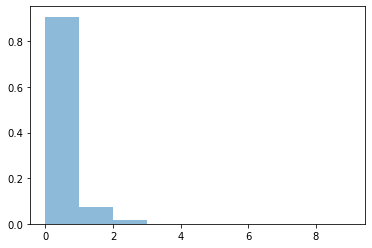

In [8]:
numberSubvertex = []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='State':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'regions'):
                        cont = cont + 1
            numberSubvertex.append(cont)
            
bins = np.arange(0, 10, 1)
plt.hist(numberSubvertex, bins = bins, alpha=0.5, density = True)

In [9]:
best = whichFitsBetter(numberSubvertex)
print(best)
lambda_= best['params']
#print(r,p)
#print(best)

Optimization terminated successfully.
         Current function value: 0.352679
         Iterations: 29
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.396318
         Iterations: 15
         Function evaluations: 31
Optimization terminated successfully.
         Current function value: 0.359923
         Iterations: 7
         Function evaluations: 14
{'dis': 'poisson', 'params': 0.10805860805860806}


In [10]:
best

{'dis': 'poisson', 'params': 0.10805860805860806}

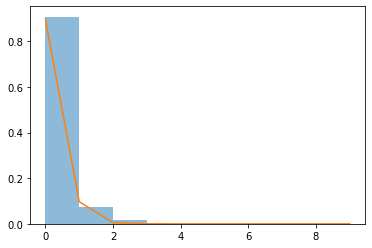

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import nbinom
from scipy.stats import poisson


t = np.arange(0, 10, 1)
#d = nbinom.pmf(t, 1, p, 0)
d = poisson.pmf(t,lambda_)
#np.exp(-np.mean(numberClassifiers))*np.power(np.mean(numberClassifiers), t)/factorial(t)
plt.hist(numberSubvertex, bins = bins, alpha=0.5, density = True)
plt.plot(t, d, '-')
plt.show()

## Type of vertices

In [12]:
import numpy as np
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'FinalState'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'State'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'Synchronization'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Choice'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Exit'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Entry'):
            p[1] = p[1] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0))

[0.65301158 0.34698842]


In [13]:
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'FinalState'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'State'):
            p[1] = p[1] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0))

[0.02378378 0.97621622]


In [14]:
ps = []
for G in Gs:
    p = [0, 0, 0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'Synchronization'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'Choice'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'Exit'):
            p[2] = p[2] + 1
        if (G.nodes[n]['type'] == 'Entry'):
            p[3] = p[3] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0))

[0.0036036  0.03990991 0.01459459 0.94189189]


## Transitions per state

(array([0.28571429, 0.49450549, 0.17765568, 0.02564103, 0.01282051,
        0.        , 0.0018315 , 0.0018315 , 0.        ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

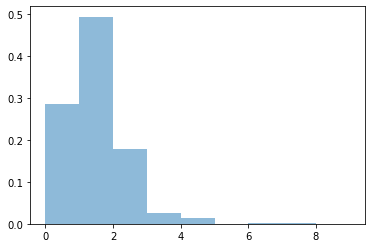

In [15]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'State'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = True)

In [16]:
lambda_ = whichFitsBetter(numberTransitions)['params']
print(lambda_)

Optimization terminated successfully.
         Current function value: 1.302996
         Iterations: 20
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: 1.237490
         Iterations: 10
         Function evaluations: 20
1.0018315018315018


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


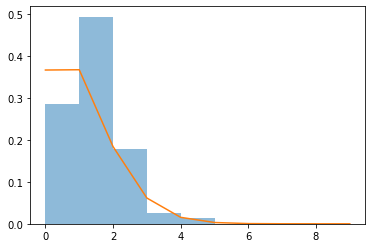

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import poisson


t = np.arange(0, 10, 1)
d = poisson.pmf(t, lambda_, 0)

#np.exp(-np.mean(numberClassifiers))*np.power(np.mean(numberClassifiers), t)/factorial(t)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = True)
plt.plot(t, d, '-')
plt.show()

(array([0., 0., 1., 0., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 <a list of 5 Patch objects>)

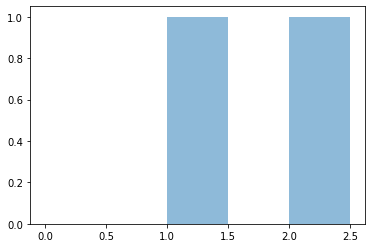

In [18]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Synchronization'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 3, 0.5)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = False)

In [19]:
whichFitsBetter(numberTransitions)

Optimization terminated successfully.
         Current function value: 0.725791
         Iterations: 19
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 1.238376
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'uniform', 'params': (1, 2)}

(array([ 0.,  0.,  2.,  0., 16.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
 <a list of 19 Patch objects>)

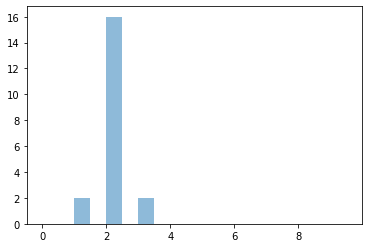

In [20]:
numberTransitions = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Choice'):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'outgoingTransitions'):
                        cont = cont + 1
            numberTransitions.append(cont)
bins = np.arange(0, 10, 0.5)
plt.hist(numberTransitions, bins = bins, alpha=0.5, density = False)

In [21]:
whichFitsBetter(numberTransitions)

Optimization terminated successfully.
         Current function value: 0.614220
         Iterations: 21
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: 1.347399
         Iterations: 11
         Function evaluations: 22


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'norm', 'params': (2.0, 0.4472135954999579)}

## Number vertex per region

## Statechart

(array([0.        , 0.        , 0.19095477, 0.46733668, 0.13567839,
        0.12060302, 0.06030151, 0.02512563, 0.        ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

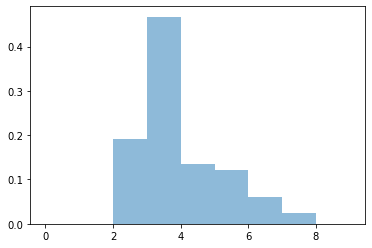

In [22]:
def fromStateChart(G,n):
    for m in G:
        if (G.nodes[m]['type'] == 'Statechart'):
            try:
                for e in G[m][n]:
                    if (G[m][n][e]['type'] == 'regions'):
                        return True
            except:
                return False
    return False

numberVert = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Region') and (fromStateChart(G,n)):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'vertices'):
                        cont = cont + 1
            numberVert.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberVert, bins = bins, alpha=0.5, density = True)

In [23]:
print(whichFitsBetter(numberVert))

Optimization terminated successfully.
         Current function value: 1.633323
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1.745329
         Iterations: 12
         Function evaluations: 24
{'dis': 'uniform', 'params': (2, 7)}


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


## State

(array([0.11428571, 0.08571429, 0.28571429, 0.31428571, 0.11428571,
        0.08571429, 0.        , 0.        , 0.        ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

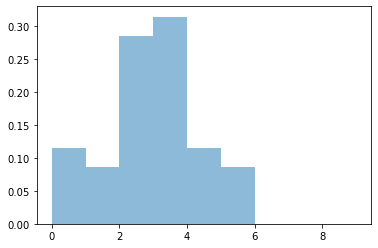

In [24]:
def fromState(G,n):
    for m in G:
        if (G.nodes[m]['type'] == 'State'):
            try:
                for e in G[m][n]:
                    if (G[m][n][e]['type'] == 'regions'):
                        return True
            except:
                return False
    return False

numberVert = []
for G in Gs:
    for n in G:
        if (G.nodes[n]['type'] == 'Region') and (fromState(G,n)):
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'vertices'):
                        cont = cont + 1
            numberVert.append(cont)
bins = np.arange(0, 10, 1)
plt.hist(numberVert, bins = bins, alpha=0.5, density = True)

In [25]:
whichFitsBetter(numberVert)

Optimization terminated successfully.
         Current function value: 1.726476
         Iterations: 23
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: 1.757051
         Iterations: 12
         Function evaluations: 24


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'uniform', 'params': (0, 5)}

# For VIATRA and Atlan, estimating the scope using KDE

## Viatra

In [3]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np

numberObjects = [[len([n for n in G])] for G in Gs]

params = {'bandwidth': np.logspace(-1, 1, 20),
         'kernel':['gaussian', 'tophat']}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(np.array(numberObjects))
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
print("best kernel: {0}".format(grid.best_estimator_.kernel))

best bandwidth: 0.12742749857031338
best kernel: gaussian


/home/antolin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


In [5]:
kde = grid.best_estimator_
new_data = kde.sample(250, random_state=0)
new_data = new_data.reshape(-1)
new_data 

array([19.06667984, 12.97814028,  7.09834734,  8.10493707, 14.27565575,
        7.17031041, 10.95295608, 18.96949651,  8.14012687, 11.08349862,
       16.08157036,  4.79395534, 11.99690018, 11.90595457, 17.03567009,
        9.98749294,  9.11598182,  7.04042232, 17.10019981,  6.94056538,
        4.87965158,  8.94774839,  6.99783113,  7.04831436,  7.28789809,
       10.99461528, 14.87818632, 12.95591241, 10.94092512, 21.06135398,
       15.80366009, 17.00806132, 13.01994324, 12.02958625,  8.92388551,
       14.96968223, 13.81853548, 14.93713748, 12.93082452, 17.05301622,
        6.85267056, 11.09954612, 13.19043843, 14.73622699,  5.05431708,
        7.0862567 ,  8.91877299,  4.94937665, 15.98306736, 12.96205325,
       11.96062325, 10.78643103,  8.14683873, 18.1375731 ,  8.89635503,
       16.81313722,  8.06639799, 15.92662878,  5.01808874, 12.95930878,
       17.08812105, 12.08853015, 11.90753894, 17.82372139,  8.79829012,
        7.07777912, 18.84850664, 11.93541766,  6.92401319, 11.99

In [6]:
new_data2 = kde.sample(184, random_state=1)
new_data2 = new_data2.reshape(-1)
new_data2

array([13.1010254 , 17.92054504, 13.06633574, 12.85417944, 18.10217915,
       12.00593395,  7.97622588, 10.98703478, 20.11071999, 18.09562308,
       13.06746844, 17.01754692,  9.00991655, 18.07879865,  8.0296262 ,
        7.08697582, 12.9604826 ,  9.68973471, 18.13237482,  9.27868135,
       11.05624197, 15.98723747,  4.98261319,  6.98482922, 18.00221844,
       13.85702396, 18.93410795, 19.87295137,  8.03170385, 17.96219976,
       18.06310354, 12.97773801, 11.12568623, 12.02721009,  8.27915539,
       15.75835147,  7.91756502,  7.11487422,  9.32217822,  7.96831709,
        8.00556463,  7.97116134, 16.16966425, 15.96338908, 11.0866596 ,
       13.95924848, 15.83784102, 15.0399546 , 10.06411958,  9.16479254,
        8.98592601, 12.9213311 ,  7.07171124,  7.03067653,  8.03576445,
       10.99068343, 18.14785904, 18.04708353, 19.24270589, 13.14157918,
       18.08398107, 20.7926196 ,  7.07675204, 21.05355551, 11.10333754,
       18.13309064, 11.94891709, 10.10500097, 12.92834683,  8.24

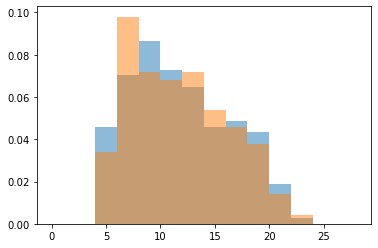

In [7]:
import matplotlib.pyplot as plt
size_bin=2
bins = np.arange(0, 30, size_bin)
numberObjects = [len([n for n in G]) for G in Gs]
hist = plt.hist(numberObjects, bins = bins, alpha=0.5,density=True)
plt.hist(new_data, bins = bins, alpha=0.5,density=True)
probs = hist[0]
probs = (probs/np.sum(probs))
objs = hist[1]

In [39]:
import numpy as np
import random
i = 0
for s in new_data:
    with open('../configurationFiles/Yakindu/model.vsconfig', 'r') as file:
        data = file.read()
    x = data.replace("#node += 29..31", "#node += "+str(int(s)))
    x = x.replace("debug =\t\t\t\"outputs/debug\"","debug =\t\t\t\"outputs"+str(i)+"/debug\"")
    x = x.replace("log =\t\t\t\"outputs/log.txt\"","log =\t\t\t\"outputs"+str(i)+"/log.txt\"")
    x = x.replace("output =\t\t\"outputs/models\"","output =\t\t\"outputs"+str(i)+"/models\"")
    x = x.replace("runs = 400","runs = 1")
    with open("../configurationFiles/Yakindu/VIATRA/yakinduGen"+str(i)+".vsconfig", "w") as text_file:
        text_file.write(x)
        i = i + 1
    

In [8]:
new_data_alloy = np.hstack((new_data,new_data2))
new_data_alloy

array([19.06667984, 12.97814028,  7.09834734,  8.10493707, 14.27565575,
        7.17031041, 10.95295608, 18.96949651,  8.14012687, 11.08349862,
       16.08157036,  4.79395534, 11.99690018, 11.90595457, 17.03567009,
        9.98749294,  9.11598182,  7.04042232, 17.10019981,  6.94056538,
        4.87965158,  8.94774839,  6.99783113,  7.04831436,  7.28789809,
       10.99461528, 14.87818632, 12.95591241, 10.94092512, 21.06135398,
       15.80366009, 17.00806132, 13.01994324, 12.02958625,  8.92388551,
       14.96968223, 13.81853548, 14.93713748, 12.93082452, 17.05301622,
        6.85267056, 11.09954612, 13.19043843, 14.73622699,  5.05431708,
        7.0862567 ,  8.91877299,  4.94937665, 15.98306736, 12.96205325,
       11.96062325, 10.78643103,  8.14683873, 18.1375731 ,  8.89635503,
       16.81313722,  8.06639799, 15.92662878,  5.01808874, 12.95930878,
       17.08812105, 12.08853015, 11.90753894, 17.82372139,  8.79829012,
        7.07777912, 18.84850664, 11.93541766,  6.92401319, 11.99

In [10]:
i = 0
for s in new_data_alloy:
    with open('../configurationFiles/Yakindu/modelAlloy.vsconfig', 'r') as file:
        data = file.read()
    x = data.replace("#node += 29..31", "#node += "+str(int(s)))
    x = x.replace("debug =\t\t\t\"outputs/debug\"","debug =\t\t\t\"outputs"+str(i)+"/debug\"")
    x = x.replace("log =\t\t\t\"outputs/log.txt\"","log =\t\t\t\"outputs"+str(i)+"/log.txt\"")
    x = x.replace("output =\t\t\"outputs/models\"","output =\t\t\"outputs"+str(i)+"/models\"")
    x = x.replace("ViatraSolver", "AlloySolver")
    with open("../configurationFiles/Yakindu/ALLOY/yakinduGen"+str(i)+".vsconfig", "w") as text_file:
        text_file.write(x)
        i = i + 1

## Atlan

In [24]:
deg_objects = [np.mean([G.out_degree(n) for n in G]) for G in Gs]
objects_deg = np.array(list(zip([n for [n] in numberObjects],deg_objects)))
objects_deg

array([[13.        ,  2.07692308],
       [ 5.        ,  1.4       ],
       [ 5.        ,  1.4       ],
       [ 9.        ,  2.22222222],
       [ 8.        ,  2.375     ],
       [ 8.        ,  2.        ],
       [12.        ,  2.41666667],
       [20.        ,  2.45      ],
       [ 5.        ,  1.4       ],
       [11.        ,  2.        ],
       [ 5.        ,  1.4       ],
       [15.        ,  1.73333333],
       [10.        ,  2.1       ],
       [17.        ,  2.        ],
       [10.        ,  2.1       ],
       [19.        ,  2.05263158],
       [10.        ,  1.8       ],
       [12.        ,  1.91666667],
       [18.        ,  2.11111111],
       [11.        ,  2.        ],
       [12.        ,  2.66666667],
       [ 7.        ,  1.71428571],
       [20.        ,  2.45      ],
       [ 5.        ,  1.4       ],
       [ 9.        ,  1.88888889],
       [18.        ,  2.27777778],
       [15.        ,  1.73333333],
       [18.        ,  2.44444444],
       [14.        ,

In [25]:
params = {'bandwidth': np.logspace(-1, 1, 20),
         'kernel':['gaussian', 'tophat']}
grid2 = GridSearchCV(KernelDensity(), params)
grid2.fit(objects_deg)
print("best bandwidth: {0}".format(grid2.best_estimator_.bandwidth))
print("best kernel: {0}".format(grid2.best_estimator_.kernel))

best bandwidth: 0.12742749857031338
best kernel: gaussian


/home/antolin/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


In [14]:
kde2 = grid2.best_estimator_
new_data2 = kde2.sample(184 * 2, random_state=0)

In [15]:
import numpy as np
import random
import subprocess
i = 0
for s in new_data2:
    subprocess.call(['java', '-jar', '../java/instantiate.jar', 
                     '-m','/home/antolin/wakame/RealisticModels/java/yakinduSimplified/model/yakinduSimplified.ecore',
                    '-f','-n','1','-s',str(s[0]),'-d',str(s[1]),'-o',
                     '/home/antolin/wakame/AssessingRealisticGenerators/syntheticModels/RAND/Yakindu/'+str(i)+'/',
                    '-e',str(i)])
    i = i + 1